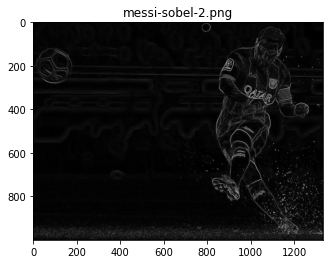

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('messi.jpg')).astype(np.uint8)

# Sobel Operator
h, w, d = img.shape

# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w, d))

# offset by 1
for channel in range(d):
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                             (horizontal[0, 1] * img[i - 1, j, channel]) + \
                             (horizontal[0, 2] * img[i - 1, j + 1, channel]) + \
                             (horizontal[1, 0] * img[i, j - 1, channel]) + \
                             (horizontal[1, 1] * img[i, j, channel]) + \
                             (horizontal[1, 2] * img[i, j + 1, channel]) + \
                             (horizontal[2, 0] * img[i + 1, j - 1, channel]) + \
                             (horizontal[2, 1] * img[i + 1, j, channel]) + \
                             (horizontal[2, 2] * img[i + 1, j + 1, channel])

            verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                           (vertical[0, 1] * img[i - 1, j, channel]) + \
                           (vertical[0, 2] * img[i - 1, j + 1, channel]) + \
                           (vertical[1, 0] * img[i, j - 1, channel]) + \
                           (vertical[1, 1] * img[i, j, channel]) + \
                           (vertical[1, 2] * img[i, j + 1, channel]) + \
                           (vertical[2, 0] * img[i + 1, j - 1, channel]) + \
                           (vertical[2, 1] * img[i + 1, j, channel]) + \
                           (vertical[2, 2] * img[i + 1, j + 1, channel])

            # Edge Magnitude
            mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
            # Avoid underflow: clip result
            newgradientImage[i - 1, j - 1, channel] = mag

# now add the images r g and b
rgb_edge = newgradientImage[:,:,0] + newgradientImage[:,:,1] + newgradientImage[:,:,2]

plt.figure()
plt.title('messi-sobel-2.png')
plt.imsave('messi-sobel-2.png', rgb_edge, cmap='gray', format='png')
plt.imshow(rgb_edge, cmap='gray')
plt.show()